In [1]:
import pandas as pd
import numpy as np

In [2]:
menu = pd.read_csv('mac_m.csv',sep=';')

In [3]:
food_items = list(menu.item.unique()) # список продуктов

In [4]:
menu = menu.groupby(['tags'])['item'].apply(list) # группируем меню по тегам

In [5]:
menu 

tags
Apples                         [Apple Slices, Baked Apple Pie, Fruit & Maple ...
Artificial Sweeteners                                                [Diet Coke]
Bacon                          [Bacon Ranch Grilled Chicken Salad, Bacon Ranc...
Bagel                                                [Bacon, Egg & Cheese Bagel]
Banana                                              [Strawberry Banana Smoothie]
Beef                           [Big Mac, Cheeseburger, Double Cheeseburger, D...
Big Mac Sauce                                                          [Big Mac]
Biscuit                        [Bacon, Egg  & Cheese Biscuit, Big Breakfast, ...
Blueberries                                            [Fruit 'N Yogurt Parfait]
Breading                       [Chicken McNuggets, Bacon Ranch Salad with But...
Breakfast                      [Bacon, Egg  & Cheese Biscuit, Bacon, Egg & Ch...
Breakfast Sauce                                      [Bacon, Egg & Cheese Bagel]
Bun                    

In [6]:
order_data = pd.DataFrame(columns=['order_id','user_id','gender','vector']+food_items)
# инициализируем датафрейм для заказов

In [8]:
users = []
# сгенерируем для начала 20 пользователей
n_users=20
for i in range(1,n_users+1):
    vector = np.random.uniform(low=-0.5, high=0.5, size=128).tolist() # векторное представление лица
    gender = bool(np.random.choice([0,1])) #1: м, 0: ж
    users.append([i,gender,vector])

In [9]:
orders=[] # для статистики
orders_for_db=[] # для записи в бд

# сгенерируем 1000 заказов
for i in range(1,1001):
    user = users[np.random.randint(n_users)]
    user_id = user[0]
    gender = user[1]
    vector = user[2]
    
    dishes = set()
        
    p = 0 #уменьшаем вероятность заказать основное блюдо на последующих итерациях
    for j in range(3):
        main_types = ['Breakfast', 'Beef', 'Chicken & Fish'] # категории главных блюд
        is_main_picked = [main_types, None]
        main_choice = np.random.choice(is_main_picked, p=[0.8-p, 0.2+p]) # будет ли в заказе главное блюдо?

        if main_choice:
            main_type = np.random.choice(main_types, p=[0.2, 0.60, 0.2]) # если да, то какое? 

            if main_type == 'Breakfast':
                # вручную заданные вероятности заказа блюд по полу, далее так же
                m = [0.08,0.07,0.07,0.15,0.1,0.05,0.05,0.02,0.02,0.02,0.05,0.05,0.07,0.04,0.05,0.06,0.05]
                f = [0.05,0.05,0.05,0.05,0.05,0.08,0.22,0.1,0.08,0.05,0.04,0.03,0.02,0.04,0.04,0.03,0.02]
                
                if gender == 1:
                    dishes.add(np.random.choice(menu['Breakfast'], p = m))
                elif gender == 0:
                    dishes.add(np.random.choice(menu['Breakfast'], p = f))
                
            elif main_type == 'Beef':
                m = [0.25,0.05,0.1,0.15,0.05,0.13,0.12,0.15]
                f = [0.05,0.2,0.15,0.1,0.2,0.1,0.1,0.1]

                if gender == 1:
                    dishes.add(np.random.choice(menu['Beef'], p = m))
                elif gender == 0:
                    dishes.add(np.random.choice(menu['Beef'], p = f))

            elif main_type == 'Chicken & Fish':
                prob=[0.2,0.1,0.04,0.04,0.1,0.2,0.2,0.04,0.04,0.04]
                dishes.add(np.random.choice(menu['Chicken']+menu['Fish'],p=prob))
        

        side_types = ['Salad','Snack']
        is_side_picked = [side_types, None]
        side_choice = np.random.choice(is_side_picked, p=[0.6-p, 0.4+p]) # будет ли в заказе салат/картошка?

        if side_choice:
            # также для мужчин и женщин разные вероятности заказа того или иного блюда
            if gender == 1:
                side_type = np.random.choice(side_types, p=[0.15, 0.85]) 

            elif gender == 0:
                side_type = np.random.choice(side_types, p=[0.35, 0.65])  

            if side_type == 'Salad':
                prob = [0.25,0.25,0,0.25,0.25]
                dishes.add(np.random.choice(menu['Salad'],p=prob))

            elif side_type == 'Snack':
                prob=[0.025,0.025,0.025,0.9,0.025]
                dishes.add(np.random.choice(menu['Snack'], p = prob))


        dessert_types = ['Dessert']
        is_dessert_picked = [dessert_types, None]
        dessert_choice = np.random.choice(is_dessert_picked, p=[0.6-p, 0.4+p]) # будет ли в заказе десерт?
        if dessert_choice:
            m = [0.03,0.05,0.1,0.1,0.02,0.1,0.1,0.01,0.05,0.05,0.01,0.01,0.01,0.05,0.01,0.05,0.05,0.1,0.1]
            f = [0.03,0.01,0.05,0.02,0.08,0.07,0.07,0.07,0.04,0.04,0.03,0.03,0.03,0.04,0.07,0.1,0.1,0.06,0.06]
            if gender == 1:
                dishes.add(np.random.choice(menu['Dessert'], p = m))
            elif gender == 0:
                dishes.add(np.random.choice(menu['Dessert'], p = f))


        drink_types = ['Hot Beverage', 'Cold Beverage']
        is_drink_picked = [drink_types, None]
        drink_choice = np.random.choice(is_drink_picked, p=[0.9-p, 0.1+p])  # будет ли в заказе напиток?

        if drink_choice:

            drink_type = np.random.choice(drink_types, p=[0.5, 0.5])  

            if drink_type == 'Hot Beverage':
                 dishes.add(np.random.choice(menu['Hot Beverage']))

            elif drink_type == 'Cold Beverage':
                 dishes.add(np.random.choice(menu['Cold Beverage']))

        
    order = {'order_id':i,'user_id':user_id,'gender':gender, 'vector':vector} # создаем заказ из получившегося набора
    

    for d in dishes:
        order_db = {'order_id':i,'user_id':user_id,'gender':gender, 'vector':vector, 'item_id':d}
        orders_for_db.append(order_db)
        order[d] = 1
            
    orders.append(order)
    

In [10]:
ordr = pd.DataFrame(orders).fillna(0)

In [11]:
ordr_db = pd.DataFrame(orders_for_db).fillna(0)

In [13]:
ordr_db

,gender,item_id,order_id,user_id,vector
0,False,Mocha Frappe,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
1,False,World Famous Fries,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
2,False,Quarter Pounder with Cheese,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
3,False,Strawberry Shake,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
4,False,French Vanilla Latte,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
5,False,Big Mac,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
6,False,Strawberry Banana Smoothie,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
7,False,Cheeseburger,1,6,"[-0.15882438579663694, -0.2715203036701068, 0...."
8,True,Donut Sticks,2,12,"[-0.17242867736311296, 0.22357335751963936, -0..."
9,True,Coca-Cola,2,12,"[-0.17242867736311296, 0.22357335751963936, -0..."


In [14]:
from sklearn.metrics.pairwise import cosine_similarity as cs


In [18]:
g = ordr.iloc[:,0:-4] # только блюда, без информации по пользователям

,1% Low Fat Milk Jug,Americano,Apple Slices,Artisan Grilled Chicken Sandwich,Bacon Ranch Grilled Chicken Salad,Bacon Ranch Salad with Buttermilk Crispy Chicken,"Bacon, Egg & Cheese Biscuit","Bacon, Egg & Cheese Bagel","Bacon, Egg & Cheese McGriddles",Baked Apple Pie,...,Southwest Grilled Chicken Salad,Sprite,Strawberry Banana Smoothie,Strawberry Shake,Strawberry Sundae,Sweet Tea,Vanilla Cone,Vanilla Shake,World Famous Fries,Yoplait GO-GURT Low Fat Strawberry Yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
g[:2]

,1% Low Fat Milk Jug,Americano,Apple Slices,Artisan Grilled Chicken Sandwich,Bacon Ranch Grilled Chicken Salad,Bacon Ranch Salad with Buttermilk Crispy Chicken,"Bacon, Egg & Cheese Biscuit","Bacon, Egg & Cheese Bagel","Bacon, Egg & Cheese McGriddles",Baked Apple Pie,...,Southwest Grilled Chicken Salad,Sprite,Strawberry Banana Smoothie,Strawberry Shake,Strawberry Sundae,Sweet Tea,Vanilla Cone,Vanilla Shake,World Famous Fries,Yoplait GO-GURT Low Fat Strawberry Yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


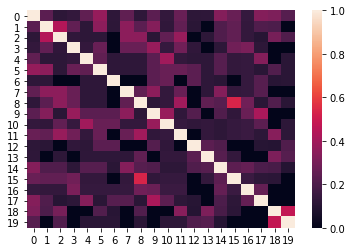

In [22]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(cs(g[:20]), linewidth=0)
plt.show()

# можно посмотреть, какие заказы похожи между собой

In [23]:
g.apply(pd.value_counts).iloc[1].sort_values(ascending=False)
# статистика по популярности продуктов

World Famous Fries                                   805
Big Mac                                              249
Quarter Pounder with Cheese Bacon                    190
Vanilla Shake                                        185
Double Cheeseburger                                  181
Chocolate Shake                                      179
McDouble                                             163
Strawberry Shake                                     161
Hot Fudge Sundae                                     155
Hot Caramel Sundae                                   153
Double Quarter Pounder with Cheese                   149
Cheeseburger                                         143
Quarter Pounder with Cheese                          143
Hamburger                                            141
Southwest Buttermilk Crispy Chicken Salad            129
Vanilla Cone                                         129
Premium Roast Coffee                                 121
Strawberry Sundae              

In [24]:
s=ordr.groupby(['gender','user_id'])[ordr.columns[:-4]].sum()
# группировка заказов по полу и по пользователям

In [25]:
s

1% Low Fat Milk Jug  Americano  Apple Slices  \
gender user_id                                                 
False  2                        2.0        2.0           4.0   
       4                        2.0        7.0           2.0   
       5                        2.0        9.0           1.0   
       6                        0.0        6.0           0.0   
       14                       5.0        6.0           0.0   
       17                       2.0        4.0           2.0   
       18                       7.0        4.0           1.0   
       20                       2.0        9.0           2.0   
True   1                        4.0       12.0           6.0   
       3                        2.0        4.0           1.0   
       7                        3.0        6.0           4.0   
       8                        1.0        3.0           1.0   
       9                        2.0        6.0           1.0   
       10                       4.0        3.0           1.0   
       11                       2.0        7.0           0.0   
       12                       2.0        2.0           0.0   
       13                       8.0        7.0           5.0   
       15                       5.0        7.0           3.0   
       16                       3.0        6.0           1.0   
       19                       1.0        8.0           2.0   

                Artisan Grilled Chicken Sandwich  \
gender user_id                                     
False  2                                     2.0   
       4                                     5.0   
       5                                     3.0   
       6                                     1.0   
       14                                    3.0   
       17                                    1.0   
       18                                    2.0   
       20                                    3.0   
True   1                                     4.0   
       3                                     2.0   
       7                                     2.0   
       8                                     2.0   
       9                                     1.0   
       10                                    2.0   
       11                                    0.0   
       12                                    0.0   
       13                                    3.0   
       15                                    3.0   
       16                                    7.0   
       19                                    3.0   

                Bacon Ranch Grilled Chicken Salad  \
gender user_id                                      
False  2                                      5.0   
       4                                      9.0   
       5                                      8.0   
       6                                      4.0   
       14                                     9.0   
       17                                     7.0   
       18                                     1.0   
       20                                     6.0   
True   1                                      5.0   
       3                                      3.0   
       7                                      5.0   
       8                                      2.0   
       9                                      5.0   
       10                                     4.0   
       11                                     3.0   
       12                                     4.0   
       13                                     4.0   
       15                                     2.0   
       16                                     6.0   
       19                                     7.0   

                Bacon Ranch Salad with Buttermilk Crispy Chicken  \
gender user_id                                                     
False  2                                                     8.0   
       4                                                    12.0   
       5               

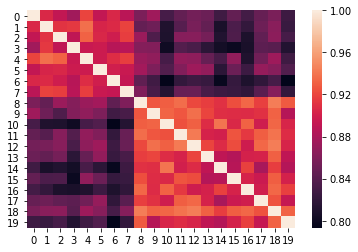

In [26]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(cs(s), linewidth=0)
plt.show()

# внутри полов заказы больше коррелируют между собой

In [25]:
import psycopg2 as pg
connection = pg.connect("dbname=cv_recommender")
cursor = connection.cursor()

In [28]:
# таблица пользователей
cursor.execute("""CREATE TABLE users (
                user_id serial PRIMARY KEY, 
                vector cube,
                gender bool);""")

In [29]:
# таблица заказов
cursor.execute("""create table orders (
                order_id serial, 
               user_id int references users (user_id),
               item_id int references items (item_id));""")

In [30]:
# заполняем таблицу пользователей сгенерированными данными
for user in users:
    data = (user[2],user[1])
    cursor.execute("INSERT INTO users(vector, gender) VALUES(cube(%s),%s)",data)

In [31]:
ordr_db = ordr_db[['order_id','user_id','item_id']]

In [32]:
cursor.execute('select item_name from items')
res = cursor.fetchall()

In [33]:
# заполняем таблицу заказов сгенерированными данными

for i,order in ordr_db.iterrows():
    data = (order.order_id,order.user_id,res.index((order.item_id,))+1)
    cursor.execute("INSERT INTO orders(order_id,user_id,item_id) VALUES(%s,%s,%s)",data)
    

In [ ]:
#connection.rollback()
#connection.commit()